In [11]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [13]:
# Download historical stock price data for Apple
ticker = "AAPL"
start_date = "1980-12-12"
end_date = "2020-12-12"
apple_data = yf.download(ticker, start=start_date, end=end_date)
mses = []
# Extract the features (last 5 days of closing prices) and target (current day's closing price)
features = pd.DataFrame(index=apple_data.index)
for j in range(6,100):
  for i in range(1, j):
      colname = f"Close-{i}"
      features[colname] = apple_data["Close"].shift(i)
  target = apple_data["Close"]

  # Split the data into training and testing sets
  train_features = features.loc[:'2020-01-01']
  train_target = target.loc[:'2020-01-01']
  test_features = features.loc['2020-01-02':]
  test_target = target.loc['2020-01-02':]
  train_features = train_features.dropna()
  train_features.columns = [f"Close-{i}" for i in range(1, j)]
  train_target = train_target.dropna()
  train_target = train_target[j-1:]
  
  model = LinearRegression(fit_intercept = False)
  model.fit(train_features.values, train_target)

# Make predictions for the test set using the recursive approach
  predictions = []
  last_five_days = train_features.tail(j-1)
  for i in range(len(test_target)):
      prediction = model.predict(last_five_days.T)
      predictions.append(prediction[0])
      last_five_days = last_five_days.shift(-1)
      last_five_days.iloc[-1] = prediction

  # Print the mean squared error
  mse = ((test_target - predictions) ** 2).mean()
  #print(f"Mean squared error: {mse:.2f}")
  mses.append(mse)
  # Print the predicted prices
  predictions_df = pd.DataFrame(predictions, index=test_target.index, columns=["Predicted"])
  #print(predictions_df)
  # print(test_target)
print(min(mses))

[*********************100%***********************]  1 of 1 completed
842.9931932109314


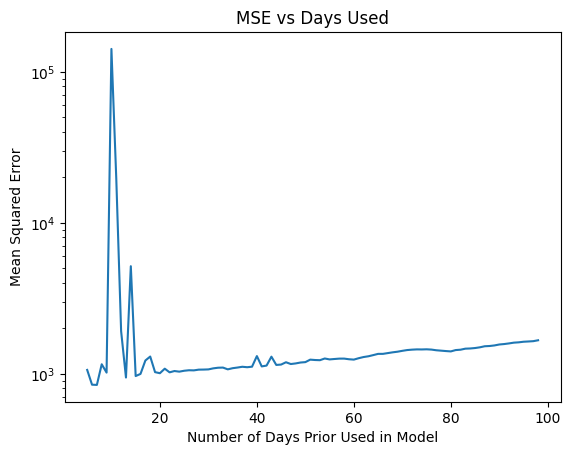

In [14]:
import matplotlib.pyplot as plt

# Create x and y data

y = range(5,99)

# Create a line graph
plt.plot(y, mses)
plt.yscale('log')

# Add labels and title
plt.xlabel('Number of Days Prior Used in Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Days Used')

# Show the plot
plt.show()
